## Let's import necessary libraries to let us visualise data

In [1]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

## Get the data of shaded streets that was prepared, counted and processed before

In [2]:
data_shaded = pd.read_csv("../data/streets_data_shaded.csv")

C:\Users\tiger\AppData\Local\Temp\ipykernel_31068\1459606223.py:1: DtypeWarning: Columns (3,5,6,8,9,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,39,40,41,42,43,45,46,47,48,49,50,51,52,53,54,56,57,58,60,61,65,66,67,70,76,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,116,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,225,227,228,229,230,231,232,233,235,236,237,239,240,242,243,244,245,246,247,248,250,251,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,28

## We gonna see which column to use while plotting shading of the streets

In [3]:
data_shaded.head()

,element_type,osmid,highway,unsigned_ref,geometry,ref,railway,source,direction,stop,...,handrail:right,delivery,pedestrian,opening_date,source:width,oneway:vehicle,vehicle:lanes:forward,length,shaded_length,shaded_percent
0,way,5004035,residential,NaN,"LINESTRING (-122.4164837 37.7990541, -122.4173...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000851,0.000000,0.00000
1,way,5071582,motorway,NaN,"LINESTRING (-122.3988926 37.7168917, -122.3989...",US 101,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002131,0.000000,0.00000
2,way,7373728,residential,NaN,"LINESTRING (-122.4001293 37.7742804, -122.4001...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000986,0.000192,0.19462
3,way,7373736,residential,NaN,"LINESTRING (-122.4001293 37.7742804, -122.3994...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005475,0.000000,0.00000
4,way,7448875,residential,NaN,"LINESTRING (-122.3911048 37.7696737, -122.3912...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001665,0.000000,0.00000


## We are using geometry column to get the linestring of the streets and shaded_percent to set the color of the street

In [4]:
data_shaded['geometry'] = data_shaded['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(data_shaded, crs='epsg:4326')
subset = gdf.sample(frac=0.9)

## Adding Color and alpha basing on percentage of shading on the street

In [5]:
colors = []
alpha = []
for x in range (len(gdf.index)):
    colors.append('#636363')
    if gdf['shaded_percent'][x]<0.1:
        alpha.append(gdf['shaded_percent'][x]+0.1)
    else:
        alpha.append(gdf['shaded_percent'][x])
gdf['color'] = colors
gdf['alpha'] = alpha

## Plotting the streets of the San Francisco basing on shaded percent 

<AxesSubplot:>

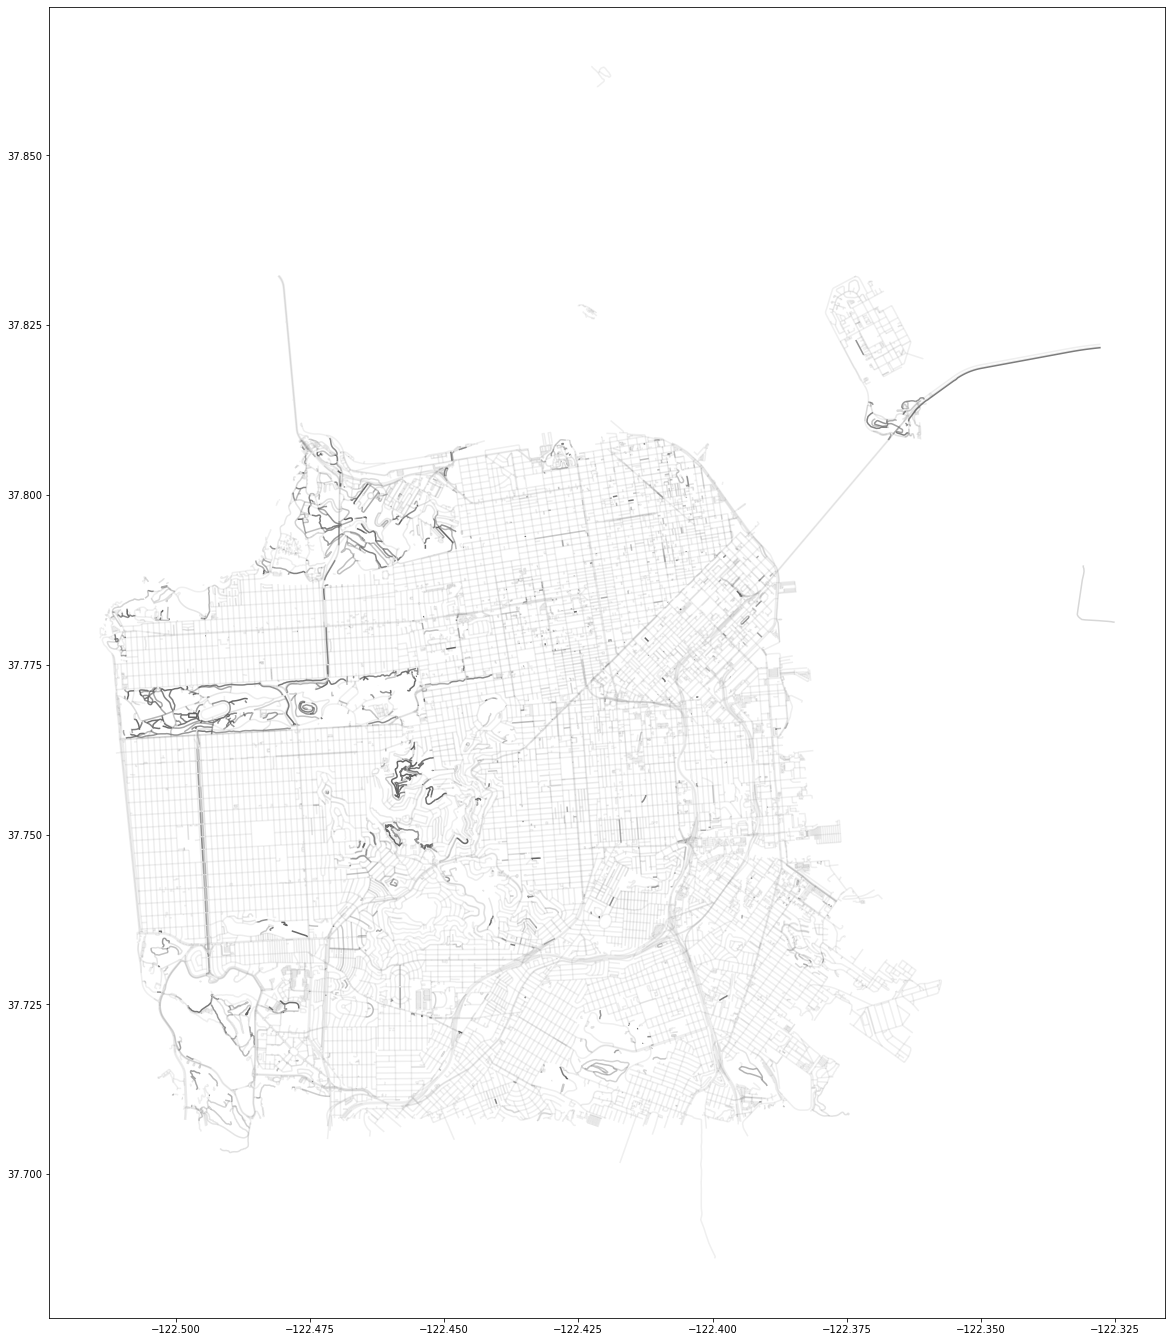

In [6]:
gdf.plot(color=gdf['color'], figsize=(20,26), alpha=gdf['alpha'])